In [2]:
import pandas as pd
import numpy as np

In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [5]:
d4 = pd.read_csv('C:/Users/19037/Documents/CPhys Tagging/trainDataset4.csv')

In [6]:
TargetVar = ['Pair Mass']
Predictors = ['Muon 1 Energy', 'Muon 2 Energy', 'Muon 1 pT', 'Muon 2 pT', 'Muon 1 Eta', 'Muon 2 Eta', 'Muon 1 Phi', 'Muon 2 Phi','Muon 1 Rapidity', 'Muon 2 Rapidity']

In [7]:
X = d4[Predictors].values
Y = d4[TargetVar].values

In [10]:
#Standarize data
from sklearn.preprocessing import StandardScaler
PredScaler = StandardScaler()
TargetVarScaler =StandardScaler()

In [11]:
#store fitting object
PredScalerFit = PredScaler.fit(X)
TargVarScalerFit = TargetVarScaler.fit(Y)

In [12]:
#generate standarized values
X = PredScalerFit.transform(X)
Y = TargVarScalerFit.transform(Y)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [4]:
model =  Sequential()

In [15]:
#define input layer
model.add( Dense(units=7, input_dim=10, kernel_initializer='normal', activation='relu') )

In [17]:
#define second layer
model.add( Dense(units=5, kernel_initializer='normal', activation='relu') )

In [18]:
#ouput layer/neuron
model.add( Dense(1, kernel_initializer='normal') )

In [21]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
#fitting model to training set
model.fit(x_train, y_train, batch_size=20, epochs=50, verbose=1)

Epoch 1/50

875/875 [==============================] - 2s 1ms/step - loss: 0.6859
Epoch 2/50
875/875 [==============================] - 1s 987us/step - loss: 0.4611
Epoch 3/50
875/875 [==============================] - 1s 969us/step - loss: 0.3937
Epoch 4/50
875/875 [==============================] - 1s 958us/step - loss: 0.3494
Epoch 5/50
875/875 [==============================] - 1s 975us/step - loss: 0.3234
Epoch 6/50
875/875 [==============================] - 1s 982us/step - loss: 0.3044
Epoch 7/50
875/875 [==============================] - 1s 1ms/step - loss: 0.2894
Epoch 8/50
875/875 [==============================] - 1s 989us/step - loss: 0.2813
Epoch 9/50
875/875 [==============================] - 1s 978us/step - loss: 0.2725
Epoch 10/50
875/875 [==============================] - 1s 968us/step - loss: 0.2678
Epoch 11/50
875/875 [==============================] - 1s 973us/step - loss: 0.2620
Epoch 12/50
875/875 [==============================] - 1s 1ms/step - loss: 0.2565
Epoch 

In [35]:
#y_test.shape
x_test.shape
#x_train.shape
#y_train.shape

(7500, 10)

In [47]:
APE_arr = 100*(np.abs(y_test - model.predict(x_test))/np.abs(y_test))

235/235 [==============================] - 0s 1ms/step


array([[34.20508126],
       [27.25197206],
       [28.94954979],
       ...,
       [48.30695669],
       [20.28577168],
       [57.7925801 ]])

In [51]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, model.predict(x_test))

235/235 [==============================] - 0s 905us/step


2.2248307299833883

In [43]:
np.mean( 100*(np.abs(y_test - model.predict(x_test))/np.abs(y_test))  )

235/235 [==============================] - 0s 907us/step


222.48307299833883

In [63]:
#create function to find best parameters
def BestParam(x_train,  y_train, x_test, y_test):
    #define list of hyper parameters
    batch_size = [15, 20, 25, 30]
    epoch_size = [30, 40, 50]
    #activation = ['relu', 'tanh', 'sigmoid']
    neurons = [9, 10, 11, 12]
    
    results = pd.DataFrame(columns=['TrialNum', 'Param', 'Accuracy'])

    #intialize trials
    TrialNum = 0
    for b in batch_size:
        for e in epoch_size:
            for n in neurons:
                TrialNum += 1
                model = Sequential()
                model.add( Dense(units=n, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu') )
                model.add( Dense(units=n, kernel_initializer='normal', activation='relu') )
                model.add( Dense(1, kernel_initializer='normal'))
                model.compile(loss='mean_squared_error', optimizer='adam')
                model.fit(x_train, y_train, batch_size=b, epochs=e, verbose=0)

                errPer = mean_absolute_percentage_error(y_test, model.predict(x_test))
                #acc = np.mean(100* ( np.abs(y_test-model.predict(x_test))/y_test ) )*(1/y_test.shape[0])

                print(TrialNum, 'Param:', 'batch_size:', b, ';', 'epoch:', e, ';', 'neurons:', n, 'Accuracy:', 100-errPer)

                results2 = pd.DataFrame(data=[[TrialNum, str(b)+';'+str(e)+';'+str(n), 100-errPer]], columns=['TrialNum', 'Param', 'Accuracy'])

    return(results2)
    

In [64]:
resultData = BestParam(x_train, y_train, x_test, y_test)

235/235 [==============================] - 0s 1ms/step
1 Param: batch_size: 15 ; epoch: 30 ; neurons: 9 Accuracy: 98.13885178093145
235/235 [==============================] - 0s 1ms/step
2 Param: batch_size: 15 ; epoch: 30 ; neurons: 10 Accuracy: 98.55458709923818
235/235 [==============================] - 0s 1ms/step
3 Param: batch_size: 15 ; epoch: 30 ; neurons: 11 Accuracy: 98.68424663074514
235/235 [==============================] - 0s 1ms/step
4 Param: batch_size: 15 ; epoch: 30 ; neurons: 12 Accuracy: 98.79504126467913
235/235 [==============================] - 1s 2ms/step
5 Param: batch_size: 15 ; epoch: 40 ; neurons: 9 Accuracy: 97.91838739722154
235/235 [==============================] - 0s 1ms/step
6 Param: batch_size: 15 ; epoch: 40 ; neurons: 10 Accuracy: 98.91096470367778
235/235 [==============================] - 0s 1ms/step
7 Param: batch_size: 15 ; epoch: 40 ; neurons: 11 Accuracy: 97.94026715280229
235/235 [==============================] - 0s 1ms/step
8 Param: batch_s

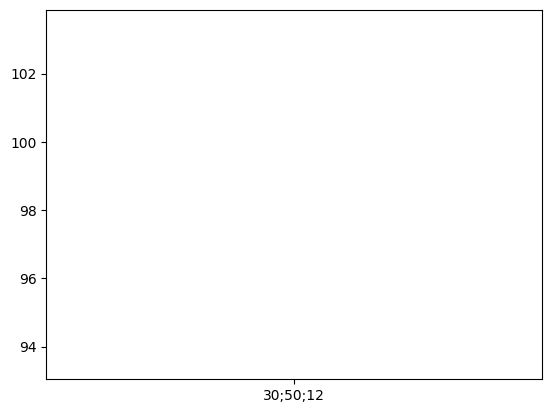

In [72]:
import matplotlib
import matplotlib.pyplot as plt
#resultData.plot(x=resultData['Param'], y=resultData['Accuracy'], kind='line')
plt.plot(resultData['Param'], resultData['Accuracy'])

In [73]:
model.fit(x_train, y_train, batch_size=5, epochs=40, verbose=0)

In [74]:
#generate predictions on testing data
Predictions = model.predict(x_test)

235/235 [==============================] - 0s 2ms/step


In [76]:
#scaling predicted back to original scale
Predictions = TargVarScalerFit.inverse_transform(Predictions)

In [77]:
#scale y_test back to original scale
y_test_OG = TargVarScalerFit.inverse_transform(y_test)

In [78]:
test_data = PredScalerFit.inverse_transform(x_test)

In [79]:
TestData = pd.DataFrame(data=test_data, columns=Predictors)
TestData['Pair Mass'] =  y_test_OG
TestData['Pair Mass Predict'] = Predictions
TestData.head()

,Muon 1 Energy,Muon 2 Energy,Muon 1 pT,Muon 2 pT,Muon 1 Eta,Muon 2 Eta,Muon 1 Phi,Muon 2 Phi,Muon 1 Rapidity,Muon 2 Rapidity,Pair Mass,Pair Mass Predict
0,106.93600,61.49450,18.57220,15.90080,-2.436080,-2.028570,-1.099610,-0.722575,-2.436070,-2.028550,10.19830,7.274010
1,29.60950,23.59960,17.70010,5.50744,1.103220,2.134370,-2.866180,1.467540,1.103210,2.134190,19.41240,15.629046
2,10.84900,6.20887,10.13040,5.94166,-0.374307,-0.298299,-0.101024,-0.877400,-0.374288,-0.298253,5.94999,4.653891
3,8.16995,10.99270,3.88724,2.77411,1.373700,2.053690,-2.844720,-2.751520,1.373380,2.052990,2.30002,2.302722
4,10.28830,5.58624,4.06831,3.48136,-1.579260,-1.050420,2.629650,2.873570,-1.578950,-1.050060,2.30323,2.434721


In [80]:
100-mean_absolute_percentage_error(TestData['Pair Mass'], TestData['Pair Mass Predict'])

99.7033413318337